
Deep Learning HW1

BY: Dema Omar , Aya Fodi


# Part 1: Binary Classification – Predicting Yearly Income Using a Feed-Forward Neural Network

In this part, the goal is to build and train a **feed-forward neural network** (FFNN) to predict whether an individual's yearly income **exceeds \$50,000**.  
The model is trained on a dataset containing **15 features** describing personal attributes such as **age, gender, nationality, education, and occupation**.  
This is a **binary classification** problem where the target variable indicates whether the income is above or below \$50K per year.

We are provided with **two CSV files**:
- `train.csv` – used strictly for training the model.
- `test.csv` – used only for validation and performance evaluation.  

### Tasks
1. Load the dataset from Google Drive and inspect its structure.  
2. Display a few samples to understand the data format.  
3. Analyze and visualize the **income distribution** (percentage earning above vs. below \$50K).  
4. **Preprocess** the data (handle categorical variables, normalize numerical features, etc.) to make it suitable for training.  
5. Define and implement a **neural network using only PyTorch**.  
6. Train the model and plot:
   - Training and validation accuracy over epochs.  
   - Training and validation loss over epochs.
7. Compare your model’s performance against the existing **benchmarks**:
   - Logistic Regression: 79.7 %  
   - SVM: 79.8 %
8. Report your model architecture: number of layers, parameters, and chosen **hyperparameters** (optimizer, learning rate, batch size, regularization, etc.).

---


In this code we connect the working environment to Google Drive to access data files stored there. After loading the data into Pandas DataFrames,we  assign names to the columns.

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive', force_remount=True)


train_df = pd.read_csv('/content/drive/My Drive/Deep learning/part1_train.csv', header=None)

test_df = pd.read_csv('/content/drive/My Drive/Deep learning/part1_test.csv', header=None)

#Defining the column names for the datasets
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

#Assigning the column names to the test dataframe
train_df.columns = column_names
test_df.columns = column_names



Mounted at /content/drive


In [ ]:
print("A couple of samples from the data to study the structure:")
print(train_df.head())
print(test_df.head())

A couple of samples from the data to study the structure:
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0         

In this code we check how many people earn more or less than $50,000 a year in the training data and shows it as percentages. we also makes sure that the income categories in the training data match those in the test data.

In [ ]:
#Counting the frequency of each value in the the column of the training dataframe
income_counts = train_df['income'].value_counts()

#Calculating the percentage
income_percentage = train_df['income'].value_counts(normalize=True) .mul(100).round(2)

print("Distribution of yearly income:")
print(income_counts)


print("\nPercentage of individuals of them more/less than 50k/year:")
print(income_percentage)

train_unique = set(train_df['income'].unique())
test_unique = set(test_df['income'].unique())

if train_unique == test_unique:
    print("\nIncome categories match in training and test datasets.")
else:
    print("\nMismatch in income categories between training and test datasets.")
    print("Training dataset income categories:", train_unique)
    print("Test dataset income categories:", test_unique)

Distribution of yearly income:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Percentage of individuals of them more/less than 50k/year:
income
<=50K    75.92
>50K     24.08
Name: proportion, dtype: float64

Mismatch in income categories between training and test datasets.
Training dataset income categories: {' >50K', ' <=50K'}
Test dataset income categories: {' <=50K.', ' >50K.'}


The code here processes data about (incomes). It first removes any missing or questionable entries. Then, it converts the income column to a binary format where 1 indicates an income over $50,000 and 0 under. It checks if the income categories are consistent between the training and testing datasets.
The code also the code identifies categorical columns and converts them to numerical values using LabelEncoder.
Finally, it normalizes certain features such as age and education level with StandardScaler to facilitate statistical analysis.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

train_df = train_df[~train_df.applymap(lambda x: x == '?').any(axis=1)]
test_df = test_df[~test_df.applymap(lambda x: x == '?').any(axis=1)]


# Convert 'income' column to string before applying string operations
train_df['income'] = train_df['income'].astype(str).str.strip().str.replace('.', '') == '>50K'
test_df['income'] = test_df['income'].astype(str).str.strip().str.replace('.', '') == '>50K'


train_unique = set(train_df['income'].unique())
test_unique = set(test_df['income'].unique())

if train_unique == test_unique:
    print("\nIncome categories match in training and test datasets.")
else:
    print("\nMismatch in income categories between training and test datasets.")

# Convert to binary (1 for >50K, 0 for <=50K)
train_df['income'] = train_df['income'].astype(int)
test_df['income'] = test_df['income'].astype(int)


#Identifying categorical columns excluding 'income' which is now a numeric target
categorical_cols = train_df.select_dtypes(include=['object']).columns

print("\nCategorical columns in the training dataset:")
print(categorical_cols)

# Check if all categories in the test set exist in the training set for each categorical column
check = True
for col in categorical_cols:
    train_unique = set(train_df[col].unique())
    test_unique = set(test_df[col].unique())

    # Check if test categories are a subset of training categories
    if not test_unique.issubset(train_unique):
        missing_in_train = test_unique - train_unique
        print(f"Column '{col}' has categories in the test set that are not in the training set:")
        print(missing_in_train)
        check = False

if check:
    print("\nAll categories in the test set exist in the training set for all categorical columns.")


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns in both training and testing data
for col in categorical_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])  # Use the same encoder to transform test data


#List of features to scale excluding 'income'
features_to_scale = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

#StandardScaler for normalization
scaler = StandardScaler()
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])


<ipython-input-42-ed7330a81c7b>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_df = train_df[~train_df.applymap(lambda x: x == '?').any(axis=1)]
<ipython-input-42-ed7330a81c7b>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_df = test_df[~test_df.applymap(lambda x: x == '?').any(axis=1)]



Income categories match in training and test datasets.

Categorical columns in the training dataset:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

All categories in the test set exist in the training set for all categorical columns.


In the code we  include steps for data preparation (including splitting into training, validation, and testing sets), model construction, and defining the training and validation process. The model consists of many fully connected layers with ReLU activation functions, chosen for their simplicity and ability to prevent the "vanishing gradient" problem while learning complex patterns. The output layer uses a sigmoid function, which maps values to a range between 0 and 1, making it ideal for predicting probabilities in binary classification. During training, the code tracks the training loss and model accuracy on both the training and validation sets, and at the end, it displays graphs to analyze the performance over epochs.

Epoch 1, Loss: 0.3923351466655731, Train Acc: 78.8889742014742, val Acc: 81.82097343773991
Epoch 2, Loss: 0.33761584758758545, Train Acc: 82.4823402948403, val Acc: 83.27959465684016
Epoch 3, Loss: 0.2792910039424896, Train Acc: 83.41907248157248, val Acc: 83.29494856440964
Epoch 4, Loss: 0.24980148673057556, Train Acc: 83.94502457002457, val Acc: 84.7535697835099
Epoch 5, Loss: 0.23556144535541534, Train Acc: 84.4210687960688, val Acc: 84.60003070781514
Epoch 6, Loss: 0.22532375156879425, Train Acc: 84.35964373464374, val Acc: 84.89175495163519
Epoch 7, Loss: 0.21941375732421875, Train Acc: 84.42874692874693, val Acc: 84.9531705819131
Epoch 8, Loss: 0.2258121371269226, Train Acc: 84.65525184275184, val Acc: 85.41378780899738
Epoch 9, Loss: 0.22143037617206573, Train Acc: 84.50936732186732, val Acc: 85.13741747274682
Epoch 10, Loss: 0.22635512053966522, Train Acc: 84.65141277641278, val Acc: 85.29095654844159


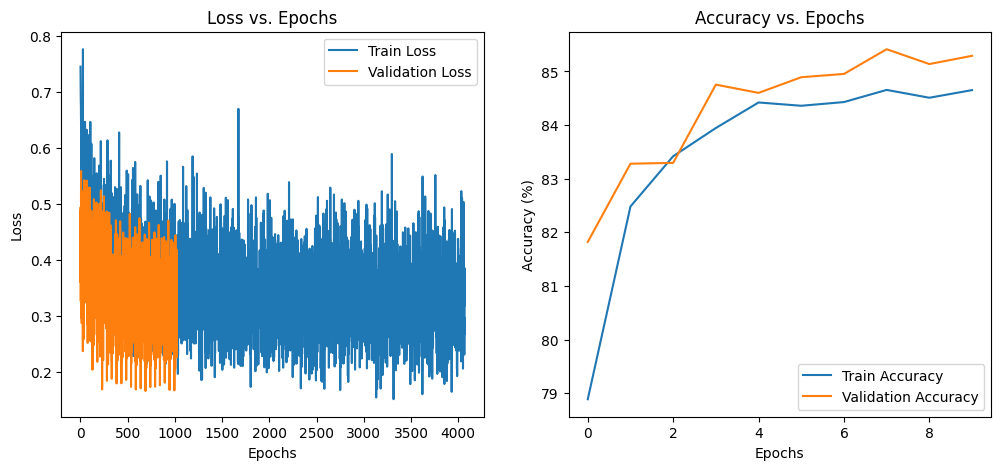

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Preparing the test dataset
X_test = test_df.drop('income', axis=1).values  # Features
y_test = test_df['income'].values  # Target

# Converting to tensors
X_test_tensor = torch.tensor(X_test.astype(np.float32))
y_test_tensor = torch.tensor(y_test.astype(np.int64))

# Creating a DataLoader for the test set
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Splitting the training data into training and validation subsets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Extracting features and labels for training data
X_train = train_data.drop('income', axis=1).values
y_train = train_data['income'].values
# Extracting features and labels for validation data
X_val = val_data.drop('income', axis=1).values
y_val = val_data['income'].values


# Converting training and validation data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.int64))

X_val_tensor = torch.tensor(X_val.astype(np.float32))
y_val_tensor = torch.tensor(y_val.astype(np.int64))


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        input_features = train_df.shape[1] - 1  # Number of features, excluding the target
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(input_features, 50)
        self.fc2 = nn.Linear(50, 30)
        self.fc3 = nn.Linear(30, 10)
       # Output layer for binary classification
        self.output = nn.Linear(10, 1)  # Output a single value for binary classification
        self.sigmoid = nn.Sigmoid()    # Apply sigmoid for probability


    # Forward pass through the network
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.output(x)) # Apply sigmoid to the output
        return x


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Creating DataLoaders for batch processing of training and validation data
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store training and validation metrics over epochs
train_losses, val_losses, train_accuracy,val_accuracy = [], [], [], []
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()
    total, correct = 0, 0   # Counters for accuracy calculation

   # Training on batches
    for inputs, labels in train_loader:
        optimizer.zero_grad()   # Clear previous gradients

        outputs = model(inputs)
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels.float())

        loss.backward()   # Backpropagation
        optimizer.step()  # Update weights


        train_losses.append(loss.item())

        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()   # Correct predictions
    train_accuracy.append(100 * correct / total)


  # Validation loop
    model.eval()
    total, correct = 0, 0
    with torch.no_grad():                # Disable gradient computation for validation
        for inputs, labels in val_loader:
            outputs = model(inputs)
            labels = labels.view(-1, 1)  # Reshape labels for compatibility
            loss = criterion(outputs, labels.float())
            val_losses.append(loss.item())

            #Convert probabilities to binary predictions
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy.append(100 * correct / total)

    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Train Acc: {train_accuracy[-1]}, val Acc: {val_accuracy[-1]}')

# Plotting the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


In [ ]:
# Evaluating the model on the test set
model.eval()
total, correct = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()  # Binary predictions
        total += labels.size(0)
        correct += (predicted.view(-1).long() == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 85.05%


# Part 2: Multi-Class Classification – Predicting Clothes Categories Using a Feed-Forward Neural Network

In this part, we use the **FashionMNIST** dataset, which consists of **70,000 grayscale images** of size **28×28 pixels**, representing **10 categories** of clothing items such as shirts, shoes, pants, and coats.  
The dataset is available through the **`torchvision.datasets`** module and will be automatically downloaded using PyTorch utilities.

The goal is to build and compare **two feed-forward neural networks (FFNNs)** with different architectures and parameter constraints, in order to classify items of clothing.

---

### Network 1 : 2-Layer Model
- A **2-layer feed-forward network**.
- Should classify only the **first 4 categories** of the dataset.
- The total number of trainable parameters **must not exceed 50,000**.

---

### Network 2 : 4-Layer Model
- A **4-layer feed-forward network**.
- Should classify **all 10 categories** of clothing.
- The total number of trainable parameters **must not exceed 60,000**.

---

### Tasks
1. **Load and preprocess** the FashionMNIST dataset (normalize, flatten images, and create DataLoaders).  
2. **Define and train both networks** using only PyTorch libraries.  
3. **Plot and compare**:
   - Training loss and validation loss over epochs.  
   - Training accuracy and validation accuracy over epochs.  
4. **Analyze results:**  
   - Compare the performance of the two models.  
  
5. Use suitable **regularization techniques**, **optimizers**, and **loss functions** discussed in class.  

---

The main goal is to demonstrate how model depth and parameter count influence performance, generalization, and training behavior in multi-class image classification.


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)


Epoch 1, Train Loss: 0.1682, val Loss: 0.1782, Train Accuracy: 89.99%, val Accuracy: 92.50%
Epoch 2, Train Loss: 0.1593, val Loss: 0.1849, Train Accuracy: 92.84%, val Accuracy: 92.94%
Epoch 3, Train Loss: 0.1337, val Loss: 0.1900, Train Accuracy: 93.36%, val Accuracy: 93.67%
Epoch 4, Train Loss: 0.1626, val Loss: 0.2028, Train Accuracy: 93.41%, val Accuracy: 93.62%
Epoch 5, Train Loss: 0.0770, val Loss: 0.1842, Train Accuracy: 93.74%, val Accuracy: 93.38%
Epoch 6, Train Loss: 0.2998, val Loss: 0.1936, Train Accuracy: 93.93%, val Accuracy: 93.62%
Epoch 7, Train Loss: 0.3221, val Loss: 0.2135, Train Accuracy: 93.88%, val Accuracy: 93.44%
Epoch 8, Train Loss: 0.2638, val Loss: 0.2067, Train Accuracy: 94.22%, val Accuracy: 93.71%
Epoch 9, Train Loss: 0.1657, val Loss: 0.2077, Train Accuracy: 94.01%, val Accuracy: 93.73%
Epoch 10, Train Loss: 0.1978, val Loss: 0.2153, Train Accuracy: 94.12%, val Accuracy: 93.85%


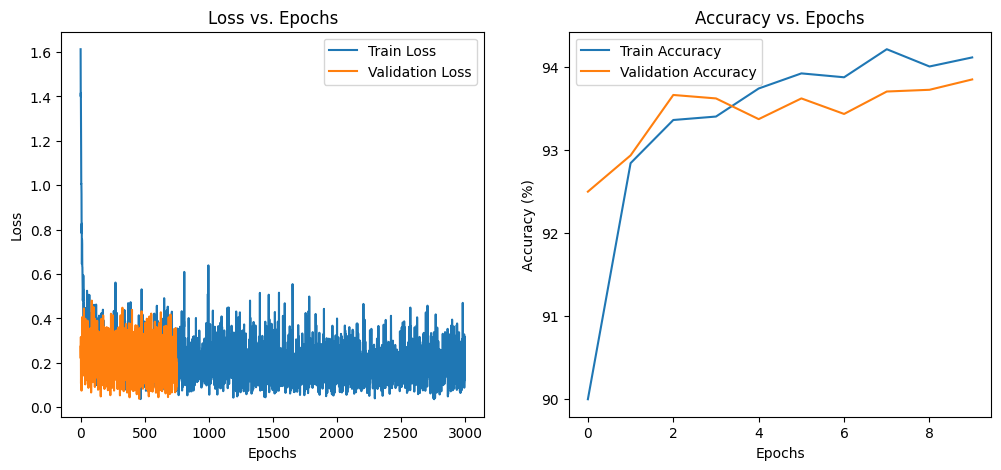

In [ ]:
class Network1(nn.Module):
    def __init__(self):
        super(Network1, self).__init__()
        self.fc = nn.Linear(784, 4)  # Fully connected layer: 784 input features, 4 output classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the 28x28 image into a 1D vector of size 784
        x = self.fc(x)  # Pass through the fully connected layer
        return x

# Filter data to include only categories 0, 1, 2, 3
train_net1 = [(img, label) for img, label in train_dataset if label in [0, 1, 2, 3]]
test_net1_data = [(img, label) for img, label in test_dataset if label in [0, 1, 2, 3]]

# Split training data into train and validation sets
train_net1_data, val_net1_data = train_test_split(train_net1, test_size=0.2, random_state=42)

# Create DataLoaders for training, validation, and testing
train_net1_loader = DataLoader(train_net1_data, batch_size=64, shuffle=True)
val_net1_loader = DataLoader(val_net1_data, batch_size=64, shuffle=False)
test_net1_loader = DataLoader(test_net1_data, batch_size=64, shuffle=False)

# Create model, loss function, and optimizer
model1 = Network1()
criterion_net1 = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer_net1 = torch.optim.Adam(model1.parameters(), lr=0.001)

val_net1_loader
num_epochs = 10

# Lists to store loss and accuracy values
train_losses, val_losses, train_accuracy, val_accuracy = [], [], [], []

# Training loop
for epoch in range(num_epochs):
    model1.train()  # Set model to training mode
    total, correct = 0, 0
    for inputs, labels in train_net1_loader:
        optimizer_net1.zero_grad()  # Reset gradients
        outputs = model1(inputs)  # Forward pass
        loss = criterion_net1(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer_net1.step()  # Update weights
        train_losses.append(loss.item())  # Save training loss

        # Compute predictions
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_accuracy.append(100 * correct / total)  # Calculate training accuracy

    # Validation loop
    model1.eval()  # Set model to evaluation mode
    total, correct = 0, 0
    with torch.no_grad():  # No gradient calculation
        for inputs, labels in val_net1_loader:
            outputs = model1(inputs)
            loss = criterion_net1(outputs, labels)
            val_losses.append(loss.item())  # Save validation loss

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy.append(100 * correct / total)  # Calculate validation accuracy

    # Print progress per epoch
    print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, val Loss: {val_losses[-1]:.4f}, "
          f"Train Accuracy: {train_accuracy[-1]:.2f}%, val Accuracy: {val_accuracy[-1]:.2f}%")

# Plot loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


Epoch 1, Train Loss: 0.5935, val Loss: 0.5069, Train Accuracy: 79.43%, val Accuracy: 83.27%
Epoch 2, Train Loss: 0.3383, val Loss: 0.3855, Train Accuracy: 85.01%, val Accuracy: 85.25%
Epoch 3, Train Loss: 0.3854, val Loss: 0.4365, Train Accuracy: 86.32%, val Accuracy: 86.15%
Epoch 4, Train Loss: 0.2829, val Loss: 0.4523, Train Accuracy: 87.17%, val Accuracy: 86.92%
Epoch 5, Train Loss: 0.2984, val Loss: 0.4818, Train Accuracy: 87.92%, val Accuracy: 86.47%
Epoch 6, Train Loss: 0.2664, val Loss: 0.4242, Train Accuracy: 88.66%, val Accuracy: 88.03%
Epoch 7, Train Loss: 0.4027, val Loss: 0.4387, Train Accuracy: 89.13%, val Accuracy: 86.96%
Epoch 8, Train Loss: 0.3909, val Loss: 0.3748, Train Accuracy: 89.39%, val Accuracy: 87.92%
Epoch 9, Train Loss: 0.3798, val Loss: 0.5089, Train Accuracy: 89.86%, val Accuracy: 87.70%
Epoch 10, Train Loss: 0.1647, val Loss: 0.3589, Train Accuracy: 90.14%, val Accuracy: 88.43%


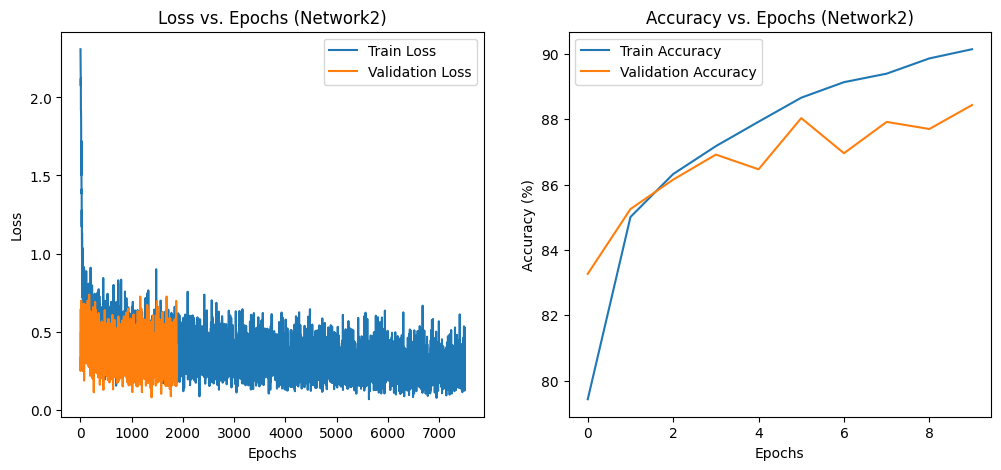

In [ ]:
class Network2(nn.Module):
    def __init__(self):
        super(Network2, self).__init__()
        self.fc1 = nn.Linear(784, 64)   # First fully connected layer
        self.fc2 = nn.Linear(64, 32)    # Second fully connected layer
        self.fc3 = nn.Linear(32, 10)    # Output layer
        self.relu = nn.ReLU()           # ReLU activation function

    def forward(self, x):
        x = x.view(-1, 28 * 28)         # Flatten 28x28 image to 1D vector (784)
        x = self.relu(self.fc1(x))      # Apply first layer + ReLU
        x = self.relu(self.fc2(x))      # Apply second layer + ReLU
        x = self.fc3(x)                 # Output layer (no activation, handled by loss)
        return x


# Use the full dataset for 10 categories
train_net2 = train_dataset
test_net2_data = test_dataset

# Split training data into train and validation sets
train_net2_data, val_net2_data = train_test_split(train_net2, test_size=0.2, random_state=42)

# Create DataLoaders for training, validation, and test sets
train_net2_loader = DataLoader(train_net2_data, batch_size=64, shuffle=True)
val_net2_loader = DataLoader(val_net2_data, batch_size=64, shuffle=False)
test_net2_loader = DataLoader(test_net2_data, batch_size=64, shuffle=False)

# Create model, loss function, and optimizer
model2 = Network2()
criterion_net2 = nn.CrossEntropyLoss()               # Cross entropy loss for multi-class classification
optimizer_net2 = torch.optim.Adam(model2.parameters(), lr=0.001)  # Adam optimizer

# Number of training epochs
num_epochs = 10

# Lists to store loss and accuracy values
train_losses_net2, val_losses_net2, train_accuracy_net2, val_accuracy_net2 = [], [], [], []

# Training loop
for epoch in range(num_epochs):
    model2.train()                 # Set model to training mode
    total, correct = 0, 0
    for inputs, labels in train_net2_loader:
        optimizer_net2.zero_grad()         # Clear gradients
        outputs = model2(inputs)           # Forward pass
        loss = criterion_net2(outputs, labels)  # Compute loss
        loss.backward()                    # Backpropagation
        optimizer_net2.step()              # Update model weights
        train_losses_net2.append(loss.item())  # Store training loss

        # Compute predictions
        _, predicted = torch.max(outputs, 1)   # Class with max probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_accuracy_net2.append(100 * correct / total)  # Calculate training accuracy

    # Validation loop
    model2.eval()                  # Set model to evaluation mode
    total, correct = 0, 0
    with torch.no_grad():          # Disable gradient calculation
        for inputs, labels in val_net2_loader:
            outputs = model2(inputs)
            loss = criterion_net2(outputs, labels)
            val_losses_net2.append(loss.item())  # Store validation loss

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy_net2.append(100 * correct / total)  # Calculate validation accuracy

    # Print training progress per epoch
    print(f"Epoch {epoch+1}, Train Loss: {train_losses_net2[-1]:.4f}, val Loss: {val_losses_net2[-1]:.4f}, "
          f"Train Accuracy: {train_accuracy_net2[-1]:.2f}%, val Accuracy: {val_accuracy_net2[-1]:.2f}%")

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses_net2, label='Train Loss')
plt.plot(val_losses_net2, label='Validation Loss')
plt.title('Loss vs. Epochs (Network2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_net2, label='Train Accuracy')
plt.plot(val_accuracy_net2, label='Validation Accuracy')
plt.title('Accuracy vs. Epochs (Network2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


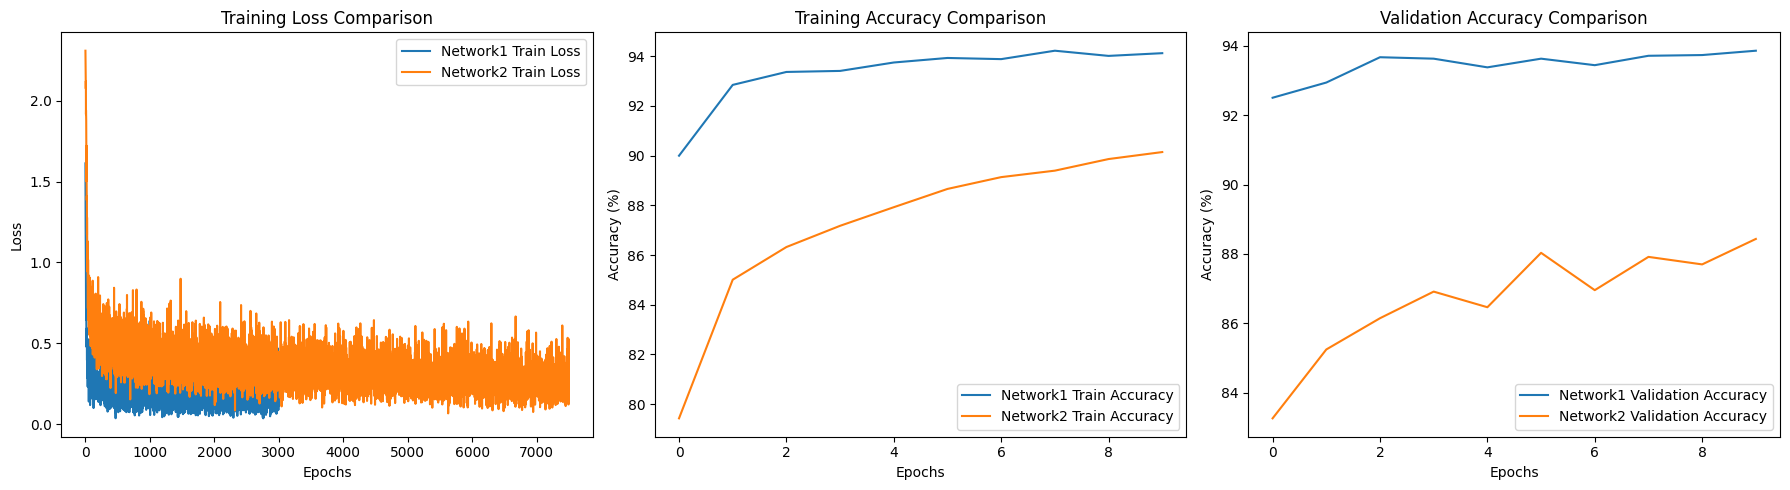

In [ ]:
# Create comparison plots between the two networks
plt.figure(figsize=(18, 5))

# Training loss comparison
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Network1 Train Loss')
plt.plot(train_losses_net2, label='Network2 Train Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training accuracy comparison
plt.subplot(1, 3, 2)
plt.plot(train_accuracy, label='Network1 Train Accuracy')
plt.plot(train_accuracy_net2, label='Network2 Train Accuracy')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# Validation accuracy comparison
plt.subplot(1, 3, 3)
plt.plot(val_accuracy, label='Network1 Validation Accuracy')
plt.plot(val_accuracy_net2, label='Network2 Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate Network1 on the test set
model1.eval()
test_total_1, test_correct_1 = 0, 0
with torch.no_grad():  # Disable gradient calculation for testing
    for inputs, labels in test_net1_loader:
        inputs = inputs.view(-1, 28 * 28)
        outputs = model1(inputs)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        test_total_1 += labels.size(0)
        test_correct_1 += (predicted == labels).sum().item()
test_accuracy_1 = 100 * test_correct_1 / test_total_1  # Calculate accuracy percentage

# Evaluate Network2 on the test set
model2.eval()
test_total_2, test_correct_2 = 0, 0
with torch.no_grad():  # Disable gradient calculation for testing
    for inputs, labels in test_net2_loader:
        inputs = inputs.view(-1, 28 * 28)
        outputs = model2(inputs)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        test_total_2 += labels.size(0)
        test_correct_2 += (predicted == labels).sum().item()
test_accuracy_2 = 100 * test_correct_2 / test_total_2  # Calculate accuracy percentage

# Print test results for both networks
print(f"Network1 Test Accuracy: {test_accuracy_1:.2f}%")
print(f"Network2 Test Accuracy: {test_accuracy_2:.2f}%")

Network1 Test Accuracy: 93.47%
Network2 Test Accuracy: 87.61%


### Explanation:
In the implementation of the two networks, the Adam optimizer was chosen due to its efficiency and balance between learning speed and accuracy, with a learning rate of 0.001, which is a suitable default for Adam and allows stable convergence of the network. The selected loss function, CrossEntropyLoss, is designed for multi-class classification tasks and enables precise loss calculation based on the probabilities of the categories. Regularization was not applied in this case, although this might have negatively affected the prevention of overfitting; adding techniques such as Dropout or L2 regularization could have improved performance. For feature reduction, Network1 uses a simple structure with a single fully connected layer to classify 4 categories, while Network2 employs a deeper architecture with a gradual reduction in the number of neurons to handle the classification of 10 categories. The activation function chosen is ReLU, due to its efficiency in addressing the vanishing gradient problem and its ability to maintain non-linearity in learning. These choices were made to balance simplicity in implementation with adaptability to the complexity of the data and task.








### Comparing  Results:
The test accuracy of Network 1 was higher than that of Network 2. This outcome is expected, as Network 1's task involves classifying only 4 categories, making it simpler. In contrast, Network 2 faces the more demanding challenge of classifying 10 categories, which naturally reduces its accuracy.
Network 2 exhibited a more notable improvement in learning compared to Network 1, as seen in the substantial rise in validation accuracy after the first epoch. This is due to the more advanced architecture of Network 2, which allows it to identify and leverage finer details in the data during the training process.
